In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#reading cleaned and sorted csvs
bottom= pd.read_csv("FinalBottom20.csv")
top= pd.read_csv("FinalTop20.csv")

#reading cleaned population data 
cleaned_pop_df = pd.read_csv("../CleanedData/cleaned_population.csv")

In [3]:
#finding the bottom 20 cities from the dataframe
df11 = cleaned_pop_df.iloc[76, :] #Columbus
df22 = cleaned_pop_df.iloc[163, :]#Midland
df33 = cleaned_pop_df.iloc[121, :]#Fayetteville
df44 = cleaned_pop_df.iloc[11, :]#Tempe
df55 = cleaned_pop_df.iloc[10, :]#Surprise
df66 = cleaned_pop_df.iloc[21, :]#Fremont
df77 = cleaned_pop_df.iloc[32, :]#Moreno Valley
df88 = cleaned_pop_df.iloc[109, :]#North Las Vegas
df99 = cleaned_pop_df.iloc[150, :]#Denton
df100 = cleaned_pop_df.iloc[84, :]#Indianapolis
df110 = cleaned_pop_df.iloc[106, :]#Omaha
df120 = cleaned_pop_df.iloc[136, :]#Pittsburgh
df130 = cleaned_pop_df.iloc[171, :]#Newport News
df140 = cleaned_pop_df.iloc[35, :]#Ontario
df150 = cleaned_pop_df.iloc[131, :]#Tulsa
df160 = cleaned_pop_df.iloc[71, :]#Port Saint Lucie
df170 = cleaned_pop_df.iloc[103, :]#Saint Louis
df180 = cleaned_pop_df.iloc[130, :]#Oklahoma City
df190 = cleaned_pop_df.iloc[143, :]#Murfreesboro
df200 = cleaned_pop_df.iloc[118, :]#Yonkers

#converting dfs into data frames and swaping row and column position
df11 = pd.DataFrame(df11)
df1 = df11.transpose()
df22 = pd.DataFrame(df22)
df2 = df22.transpose()
df33 = pd.DataFrame(df33)
df3 = df33.transpose()
df44 = pd.DataFrame(df44)
df4 = df44.transpose()
df55 = pd.DataFrame(df55)
df5 = df55.transpose()
df66 = pd.DataFrame(df66)
df6 = df66.transpose()
df77 = pd.DataFrame(df77)
df7 = df77.transpose()
df88 = pd.DataFrame(df88)
df8 = df88.transpose()
df99 = pd.DataFrame(df99)
df9 = df99.transpose()
df100 = pd.DataFrame(df100)
df10 = df100.transpose()
df110 = pd.DataFrame(df110)
df11 = df110.transpose()
df120 = pd.DataFrame(df120)
df12 = df120.transpose()
df130 = pd.DataFrame(df130)
df13 = df130.transpose()
df140 = pd.DataFrame(df140)
df14 = df140.transpose()
df150 = pd.DataFrame(df150)
df15 = df150.transpose()
df160 = pd.DataFrame(df160)
df16 = df160.transpose()
df170 = pd.DataFrame(df170)
df17 = df170.transpose()
df180 = pd.DataFrame(df180)
df18 = df180.transpose()
df190 = pd.DataFrame(df190)
df19 = df190.transpose()
df200 = pd.DataFrame(df200)
df20 = df200.transpose()

#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
Pbottom_df = pd.concat(frames).reset_index(drop=True)

#calculating changing rate in population from 2018 to 2019
Pbottom_df['Pop2018-2019'] = ''
for row in Pbottom_df:
    rate1819 = ((Pbottom_df['2019 Population']- Pbottom_df['2018 Population'])/(Pbottom_df['2019 Population']))*100
    Pbottom_df['Pop2018-2019'] = rate1819

#calculating changing rate in population from 2019 to 2020 
Pbottom_df = Pbottom_df.replace(',','', regex=True)
Pbottom_df['2020 Population'] = pd.to_numeric(Pbottom_df['2020 Population'])
Pbottom_df['Pop2019-2020'] = ''
for row in Pbottom_df:
    rate1920 = ((Pbottom_df['2020 Population']-Pbottom_df['2019 Population'])/(Pbottom_df['2020 Population']))*100
    Pbottom_df['Pop2019-2020'] = rate1920

#dropping unwanted columns 
Pbottom_df.drop(Pbottom_df.iloc[:, 3:6], inplace = True, axis = 1)
del Pbottom_df["Unnamed: 0"]
Pbottom_df

#adding housing price rates data
Pbottom_df["Housing2018-2019"] = bottom["2018-2019 changing rate"]
Pbottom_df["Housing2019-2020"] = bottom["2019-2020 changing rate"]

#making new dfs sorted by years 
#2018-2019
Bbottom1819 =Pbottom_df.copy()
del Bbottom1819["Pop2019-2020"]
del Bbottom1819["Housing2019-2020"]

#2019-2020
Bbottom1920 =Pbottom_df.copy()
del Bbottom1920["Pop2018-2019"]
del Bbottom1920["Housing2018-2019"]



In [4]:
#finding the Top20 cities from the dataframe
df11 = cleaned_pop_df.iloc[168, :] #Salt Lake City
df22 = cleaned_pop_df.iloc[64, :]#Hialeah
df33 = cleaned_pop_df.iloc[111, :]#Jersey City
df44 = cleaned_pop_df.iloc[27, :]#Irvine
df55 = cleaned_pop_df.iloc[169, :]#Alexandria
df66 = cleaned_pop_df.iloc[175, :]#Bellevue
df77 = cleaned_pop_df.iloc[154, :]#Garland
df88 = cleaned_pop_df.iloc[5, :]#Glendale
df99 = cleaned_pop_df.iloc[140, :]#Clarksville
df100 = cleaned_pop_df.iloc[74, :]#Tampa
df110 = cleaned_pop_df.iloc[67, :]#Miami
df120 = cleaned_pop_df.iloc[149, :]#Dallas
df130 = cleaned_pop_df.iloc[85, :]#Des Moines
df140 = cleaned_pop_df.iloc[167, :]#Waco
df150 = cleaned_pop_df.iloc[176, :]#Seattle
df160 = cleaned_pop_df.iloc[94, :]#Boston
df170 = cleaned_pop_df.iloc[157, :]#Irving
df180 = cleaned_pop_df.iloc[134, :]#Salem
df190 = cleaned_pop_df.iloc[132, :]#Eugene
df200 = cleaned_pop_df.iloc[72, :]#Saint Petersburg

#converting dfs into data frames and swaping row and column position
df11 = pd.DataFrame(df11)
df1 = df11.transpose()
df22 = pd.DataFrame(df22)
df2 = df22.transpose()
df33 = pd.DataFrame(df33)
df3 = df33.transpose()
df44 = pd.DataFrame(df44)
df4 = df44.transpose()
df55 = pd.DataFrame(df55)
df5 = df55.transpose()
df66 = pd.DataFrame(df66)
df6 = df66.transpose()
df77 = pd.DataFrame(df77)
df7 = df77.transpose()
df88 = pd.DataFrame(df88)
df8 = df88.transpose()
df99 = pd.DataFrame(df99)
df9 = df99.transpose()
df100 = pd.DataFrame(df100)
df10 = df100.transpose()
df110 = pd.DataFrame(df110)
df11 = df110.transpose()
df120 = pd.DataFrame(df120)
df12 = df120.transpose()
df130 = pd.DataFrame(df130)
df13 = df130.transpose()
df140 = pd.DataFrame(df140)
df14 = df140.transpose()
df150 = pd.DataFrame(df150)
df15 = df150.transpose()
df160 = pd.DataFrame(df160)
df16 = df160.transpose()
df170 = pd.DataFrame(df170)
df17 = df170.transpose()
df180 = pd.DataFrame(df180)
df18 = df180.transpose()
df190 = pd.DataFrame(df190)
df19 = df190.transpose()
df200 = pd.DataFrame(df200)
df20 = df200.transpose()

#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
Ptop_df = pd.concat(frames).reset_index(drop=True)

#calculating changing rate in population from 2018 to 2019
Ptop_df['Pop2018-2019'] = ''
for row in Ptop_df:
    rate1819 = ((Ptop_df['2019 Population']- Ptop_df['2018 Population'])/(Ptop_df['2019 Population']))*100
    Ptop_df['Pop2018-2019'] = rate1819

#calculating changing rate in population from 2019 to 2020 
Ptop_df = Ptop_df.replace(',','', regex=True)
Ptop_df['2020 Population'] = pd.to_numeric(Ptop_df['2020 Population'])
Ptop_df['Pop2019-2020'] = ''
for row in Ptop_df:
    rate1920 = ((Ptop_df['2020 Population']-Ptop_df['2019 Population'])/(Ptop_df['2020 Population']))*100
    Ptop_df['Pop2019-2020'] = rate1920

#dropping unwanted columns 
Ptop_df.drop(Ptop_df.iloc[:, 3:6], inplace = True, axis = 1)
del Ptop_df["Unnamed: 0"]

#adding housing price rates data
Ptop_df["Housing2018-2019"] = top["2018-2019 changing rate"]
Ptop_df["Housing2019-2020"] = top["2019-2020 changing rate"]

#making new dfs sorted by years 
#2018-2019
Ptop1819 =Ptop_df.copy()
del Ptop1819["Pop2019-2020"]
del Ptop1819["Housing2019-2020"]

#2019-2020
Ptop1920 =Ptop_df.copy()
del Ptop1920["Pop2018-2019"]
del Ptop1920["Housing2018-2019"]

In [16]:
Ptop1920

,City,State,Pop2019-2020,Housing2019-2020
0,Salt Lake City,UT,5.999053,5.444049
1,Hialeah,FL,4.057843,2.957263
2,Jersey City,NJ,3.328673,2.725910
3,Irvine,CA,5.446512,0.979877
4,Alexandria,VA,3.813017,5.244705
5,Bellevue,WA,4.192128,5.604749
6,Garland,TX,2.716248,2.453434
7,Glendale,AZ,0.832613,4.771870
8,Clarksville,TN,3.860276,6.599305
9,Tampa,FL,3.385029,5.629867


<IPython.core.display.Javascript object>


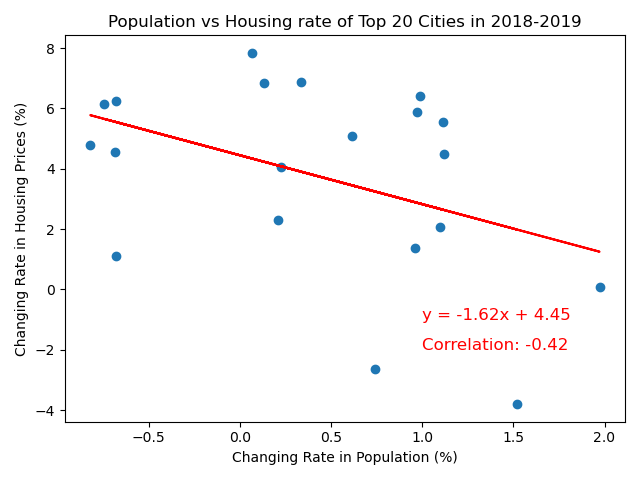

The r-value is: 0.17339584131460195.
The correlation is -0.42


In [54]:
#plotting scatter plot/regression of top 20 Cities' pop rate vs housing rate in 2018-2019
%matplotlib notebook
x_values = Ptop1819['Pop2018-2019']
y_values = Ptop1819['Housing2018-2019']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of Top 20 Cities in 2018-2019")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(1,-1), fontsize=12,color="red")
plt.annotate(eq, (1,-2), fontsize=12, color='red')
plt.tight_layout()
plt.savefig('../Output/Q3topcorrelation2018-2019.png')
plt.show()

<IPython.core.display.Javascript object>


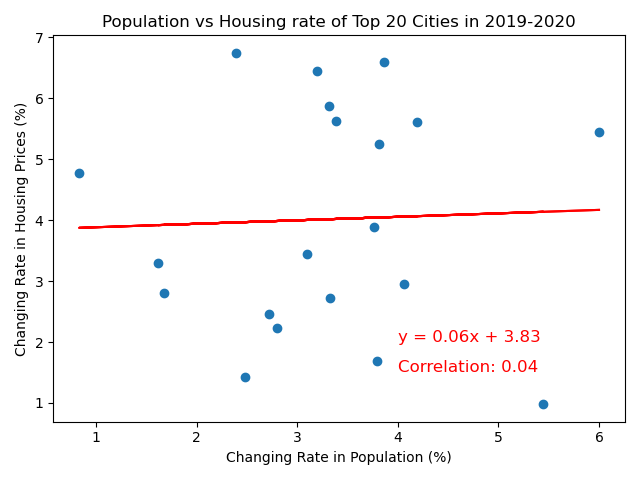

The r-value is: 0.0014070955699750593.
The correlation is 0.04


In [58]:
#plotting scatter plot/regression of top 20 Cities' pop rate vs housing rate in 2019-2020
x_values = Ptop1920['Pop2019-2020']
y_values = Ptop1920['Housing2019-2020']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of Top 20 Cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.annotate(line_eq,(4,2), fontsize=12,color="red")

eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(eq, (4,1.5), fontsize=12, color='red')

plt.tight_layout()
plt.savefig('../Output/Q3topcorrelation2019-2020.png')
plt.show()

<IPython.core.display.Javascript object>


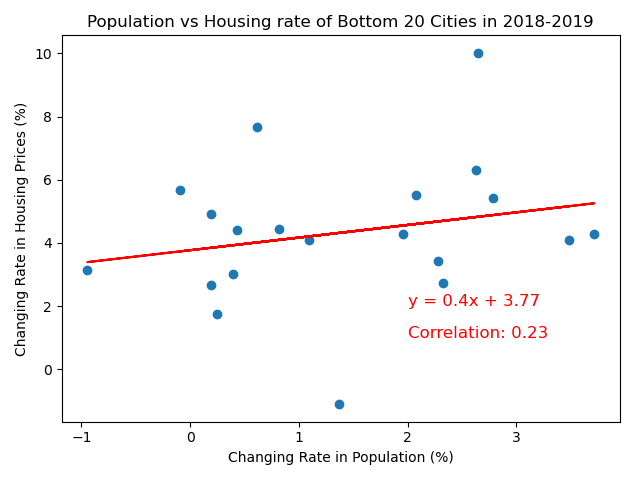

The r-value is: 0.0523626977080718.
The correlation is 0.23


In [66]:
#plotting scatter plot/regression of bottom 20 Cities' pop rate vs housing rate in 2018-2019
x_values = Bbottom1819['Pop2018-2019']
y_values = Bbottom1819['Housing2018-2019']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of Bottom 20 Cities in 2018-2019")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(2,2), fontsize=12,color="red")
plt.annotate(eq, (2,1), fontsize=12, color='red')
plt.tight_layout()
plt.savefig('../Output/Q3bottomcorrelation2018-2019.png')
plt.show()

<IPython.core.display.Javascript object>


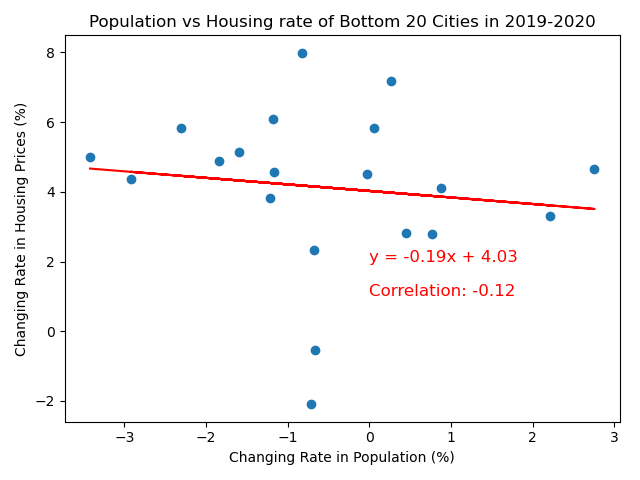

The r-value is: 0.015331688392490639.
The correlation is -0.12


In [68]:
#plotting scatter plot/regression of bottom 20 Cities' pop rate vs housing rate in 2019-2020
x_values = Bbottom1920['Pop2019-2020']
y_values = Bbottom1920['Housing2019-2020']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of Bottom 20 Cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(0,2), fontsize=12,color="red")
plt.annotate(eq, (0,1), fontsize=12, color='red')
plt.tight_layout()
plt.savefig('../Output/Q3bottomcorrelation2019-2020.png')
plt.show()

In [55]:
#plotting bar graph of top 20 Cities' pop rate vs housing rate in 2018-2019
# %matplotlib notebook


# ax = Ptop1819.plot.barh(color=["mediumorchid","orange"], rot=0)
# ax.set_title("Population rate vs Housing rate of Top 20 Cities in 2018-2019")
# ax.set_xlabel("Annual Rate of Change in Housing Price")
# ax.set_ylabel("Changing Rate in House Price")
# x_axis = np.arange(Ptop1819["City"].nunique())
# tick_locations = [value for value in x_axis]
# plt.yticks(tick_locations, list(Ptop1819["City"]), rotation='horizontal')
# plt.legend(loc = 'best')
# plt.tight_layout()
# plt.savefig('../Output/Population rate vs Housing rate of Top 20 Cities in 2018-2019.png')
# plt.show()

In [59]:
# #plotting bar graph of top 20 Cities' pop rate vs housing rate in 2019-2020
# %matplotlib notebook
# ax = Ptop1920.plot.barh(color=["mediumorchid","orange"], rot=0)
# ax.set_title("Population rate vs Housing rate of Top 20 Cities in 2019-2020")
# ax.set_xlabel("Annual Rate of Change in Housing Price")
# ax.set_ylabel("Changing Rate in House Price")
# x_axis = np.arange(Ptop1920["City"].nunique())
# tick_locations = [value for value in x_axis]
# plt.yticks(tick_locations, list(Ptop1920["City"]), rotation='horizontal')
# plt.tight_layout()
# plt.savefig('../Output/Population rate vs Housing rate of Top 20 Cities in 2019-2020.png')
# plt.legend(loc = 'best')
# plt.show()

In [52]:
# #plotting bar graph of bottom 20 Cities' pop rate vs housing rate in 2018-2019
# %matplotlib notebook
# ax = Bbottom1819.plot.barh(color=["lightslategray","lightcoral"], rot=0)
# ax.set_title("Population rate vs Housing rate of Bottom 20 Cities in 2018-2019")
# ax.set_xlabel("Annual Rate of Change in Housing Price")
# ax.set_ylabel("Changing Rate in House Price")
# x_axis = np.arange(Bbottom1819["City"].nunique())
# tick_locations = [value for value in x_axis]
# plt.yticks(tick_locations, list(Bbottom1819["City"]), rotation='horizontal')
# plt.legend(loc = 'best')
# plt.savefig('../Output/Population rate vs Housing rate of Bottom 20 Cities in 2018-2019.png')
# plt.tight_layout()
# plt.show()

In [69]:
# #plotting bar graph of bottom 20 Cities' pop rate vs housing rate in 2019-2020
# %matplotlib notebook
# ax = Bbottom1920.plot.barh(color=["lightslategray","lightcoral"], rot=0)
# ax.set_title("Population rate vs Housing rate of Bottom 20 Cities in 2019-2020")
# ax.set_xlabel("Annual Rate of Change in Housing Price")
# ax.set_ylabel("Changing Rate in House Price")
# x_axis = np.arange(Bbottom1920["City"].nunique())
# tick_locations = [value for value in x_axis]
# plt.yticks(tick_locations, list(Bbottom1920["City"]), rotation='horizontal')
# plt.legend(loc = 'best')
# plt.savefig('../Output/Population rate vs Housing rate of Bottom 20 Cities in 2019-2020.png')
# plt.tight_layout()
# plt.show()

In [72]:
commoncities = pd.read_csv("ChangingRates.csv")
commoncities

,Unnamed: 0,city,PDR1819,PDR1920,HDR1819,HDR1920,RDR1819,RDR1920
0,0,Salt Lake City,0.065857,6.381907,2.014300,-0.280364,2.314455,-0.639372
1,1,Miami,1.111450,3.937277,1.519817,5.104837,3.534751,1.173697
2,2,Seattle,1.541291,3.909112,4.593249,3.079616,2.377688,0.673756
3,3,Tampa,0.621299,3.503628,1.021659,1.288111,3.263806,1.545500
4,4,Atlanta,1.731894,3.339904,5.193249,2.829788,3.209798,1.773491
...,...,...,...,...,...,...,...,...
76,76,Omaha,0.187094,-1.566316,7.840001,5.444049,5.276257,4.463610
77,77,Baton Rouge,-0.879428,-1.605096,1.711111,2.227123,2.645242,1.842762
78,78,Pittsburgh,-0.094487,-1.806944,3.386228,2.794442,2.975016,5.000586
79,79,St. Louis,-0.936988,-2.257000,4.821787,7.206758,4.970421,4.126580


<IPython.core.display.Javascript object>


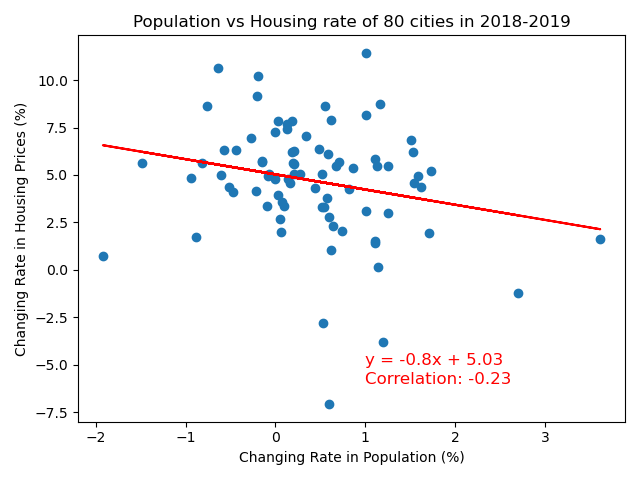

The r-value is: 0.051024182702200264.
The correlation is -0.23


In [91]:
x_values = commoncities['PDR1819']
y_values = commoncities['HDR1819']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of 80 cities in 2018-2019")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(1,-5),fontsize=12,color="red")
plt.annotate(eq, (1,-6), fontsize=12, color='red')
plt.tight_layout()
plt.savefig('../Output/80citiesPopvHousing2018-19.png')
plt.show()

<IPython.core.display.Javascript object>


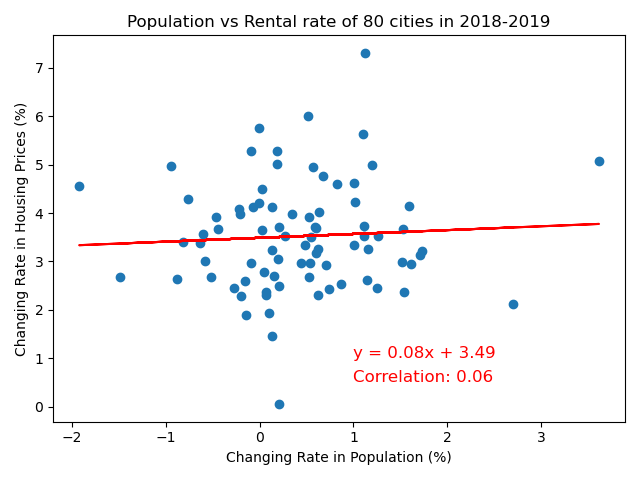

The r-value is: 0.0035941897858938763.
The correlation is 0.06


In [90]:
x_values = commoncities['PDR1819']
y_values = commoncities['RDR1819']
plt.scatter(x_values,y_values)
plt.title("Population vs Rental rate of 80 cities in 2018-2019")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(1,1),fontsize=12,color="red")
plt.annotate(eq, (1,0.5), fontsize=12, color='red')
plt.savefig('../Output/80citiesPopvRental2018-19.png')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


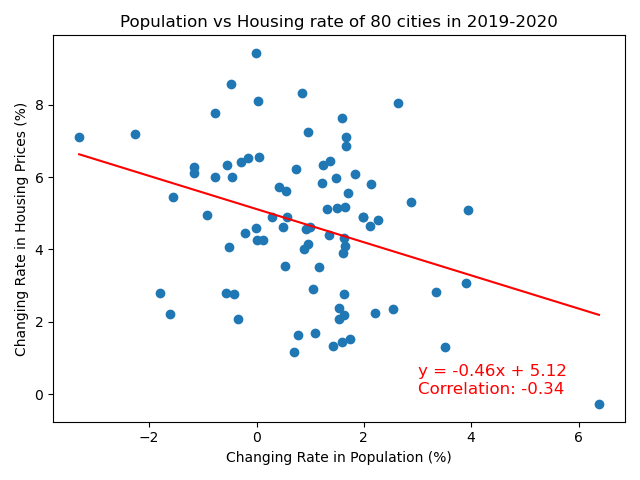

The r-value is: 0.11242669657254296.
The correlation is -0.34


In [87]:
x_values = commoncities['PDR1920']
y_values = commoncities['HDR1920']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of 80 cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(3,0.5),fontsize=12,color="red")
plt.annotate(eq, (3,0), fontsize=12, color='red')
plt.savefig('../Output/80citiesPopvHousing2019-20.png')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


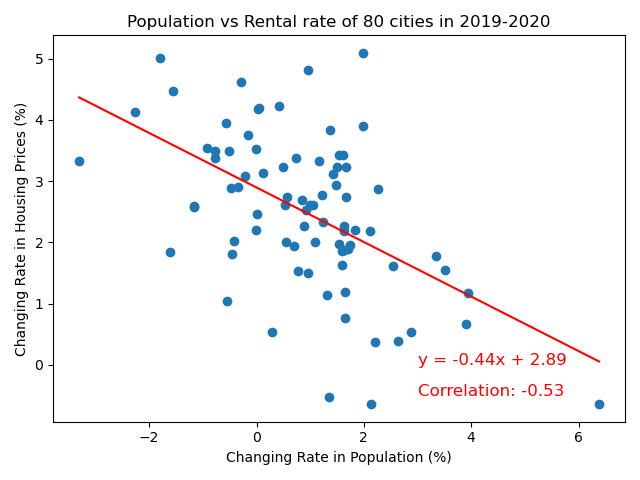

The r-value is: 0.27856453107898516.
The correlation is -0.53


In [88]:
x_values = commoncities['PDR1920']
y_values = commoncities['RDR1920']
plt.scatter(x_values,y_values)
plt.title("Population vs Rental rate of 80 cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(3,0),fontsize=12,color="red")
plt.annotate(eq, (3,-0.5), fontsize=12, color='red')
plt.savefig('../Output/80citiesPopvRental2019-20.png')
plt.tight_layout()
plt.show()

In [95]:
for city in commoncities:
    
    # Determine outliers using upper and lower bounds
    quartiles = commoncities['PDR1920'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = commoncities.loc[(commoncities['PDR1920'] < lower_bound) | (commoncities['PDR1920'] > upper_bound)]

    print(f"potential outliers: {outliers}")

potential outliers:     Unnamed: 0             city   PDR1819   PDR1920   HDR1819   HDR1920  \
0            0  Salt Lake City   0.065857  6.381907  2.014300 -0.280364   
80          80        Columbus   0.824024 -3.306448  4.248568  7.101124   

     RDR1819   RDR1920  
0   2.314455 -0.639372  
80  4.607823  3.326074  
potential outliers:     Unnamed: 0             city   PDR1819   PDR1920   HDR1819   HDR1920  \
0            0  Salt Lake City   0.065857  6.381907  2.014300 -0.280364   
80          80        Columbus   0.824024 -3.306448  4.248568  7.101124   

     RDR1819   RDR1920  
0   2.314455 -0.639372  
80  4.607823  3.326074  
potential outliers:     Unnamed: 0             city   PDR1819   PDR1920   HDR1819   HDR1920  \
0            0  Salt Lake City   0.065857  6.381907  2.014300 -0.280364   
80          80        Columbus   0.824024 -3.306448  4.248568  7.101124   

     RDR1819   RDR1920  
0   2.314455 -0.639372  
80  4.607823  3.326074  
potential outliers:     Unnamed: 0   

<IPython.core.display.Javascript object>


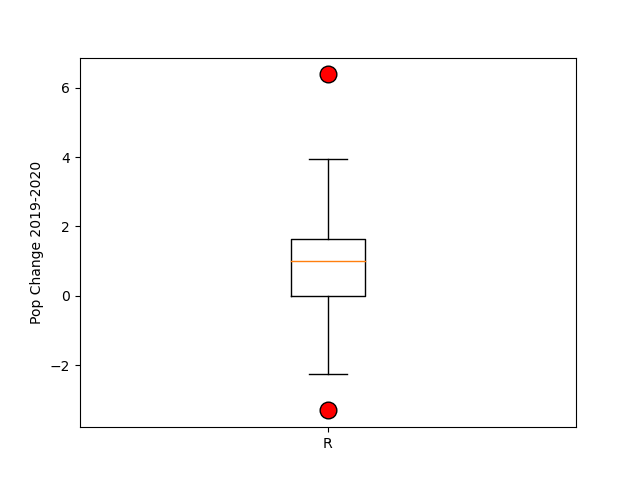

In [97]:
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o',markerfacecolor='r',markersize=12)
plt.boxplot(commoncities['PDR1920'],flierprops=flierprops)
ax1.set_xticklabels(city)
ax1.set_ylabel('Pop Change 2019-2020')
plt.show()

In [99]:
dropped = commoncities.drop([0, 80])
dropped.head()

,Unnamed: 0,city,PDR1819,PDR1920,HDR1819,HDR1920,RDR1819,RDR1920
1,1,Miami,1.111450,3.937277,1.519817,5.104837,3.534751,1.173697
2,2,Seattle,1.541291,3.909112,4.593249,3.079616,2.377688,0.673756
3,3,Tampa,0.621299,3.503628,1.021659,1.288111,3.263806,1.545500
4,4,Atlanta,1.731894,3.339904,5.193249,2.829788,3.209798,1.773491
5,5,Dallas,0.131987,2.880156,7.432460,5.322875,1.455982,0.544424


<IPython.core.display.Javascript object>


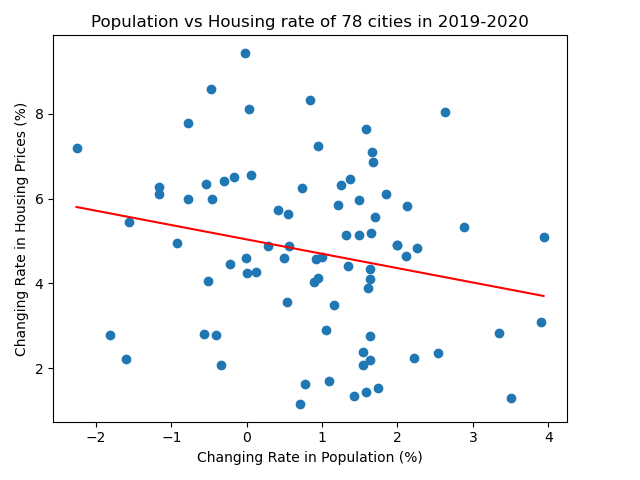

The r-value is: 0.04941193516867261.
The correlation is -0.22


In [101]:
x_values = dropped['PDR1920']
y_values = dropped['HDR1920']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of 78 cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(3,0.5),fontsize=12,color="red")
plt.annotate(eq, (3,0), fontsize=12, color='red')
plt.savefig('../Output/78citiesPopvHousing2019-20.png')
plt.tight_layout()
plt.show()
#does not show stronger correlation with dropped outliers 